In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('GDPlist.csv', encoding='latin-1')
df

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


In [4]:
#Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [8]:
#Tính giá trị lớn nhất và nhỏ nhất của GDP.
max_gdp = df['GDP (millions of US$)'].max()
min_gdp = df['GDP (millions of US$)'].min()
print("Giá trị lớn nhất của GDP là:", max_gdp)
print("Giá trị nhỏ nhất của GDP là:", min_gdp)

Giá trị lớn nhất của GDP là: 15094025
Giá trị nhỏ nhất của GDP là: 10600


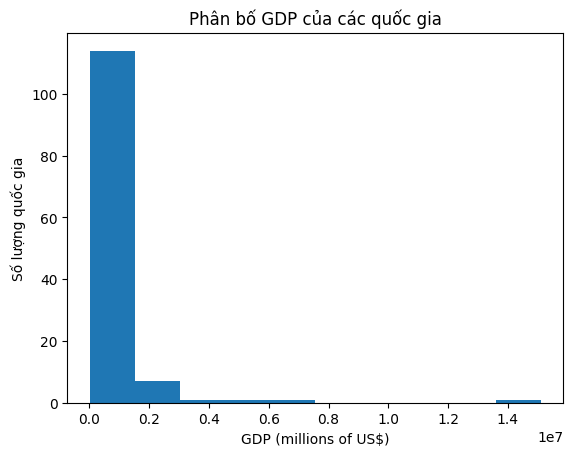

In [14]:
#Hãy cho biết xu hướng phân bố dữ liệu của GDP.
mean_gdp = df['GDP (millions of US$)'].mean()
median_gdp = df['GDP (millions of US$)'].median()
std_gdp = df['GDP (millions of US$)'].std()
plt.hist(df['GDP (millions of US$)'])
plt.title('Phân bố GDP của các quốc gia')
plt.xlabel('GDP (millions of US$)')
plt.ylabel('Số lượng quốc gia')
plt.show()
#kết luận:  nhiều quốc gia có GDP nhỏ hơn và chỉ một số ít quốc gia có GDP lớn.

In [19]:
#Hãy cho biết châu lục nào xuất hiện nhiều nhất?
continent_counts = df['Continent'].value_counts()
# Xác định châu lục xuất hiện nhiều nhất
most_common_continent = continent_counts.idxmax()
most_common_count = continent_counts.max()
print("Châu lục xuất hiện nhiều nhất là:", most_common_continent)
print("Số lượng quốc gia xuất hiện là:", most_common_count)


Châu lục xuất hiện nhiều nhất là: Europe
Số lượng quốc gia xuất hiện là: 37


In [21]:
#Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP.
#Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.
#continent_gdp = df.groupby('Continent')['GDP (millions of US$)'].agg(['sum', 'mean'])
#continent_gdp.columns = ['Tổng GDP', 'TBC GDP']
#continent_gdp
# Tính tổng GDP cho mỗi châu lục
gdp_sum = df.groupby('Continent')['GDP (millions of US$)'].sum().reset_index()
gdp_sum.rename(columns={'GDP (millions of US$)': 'Total GDP'}, inplace=True)

# Tính trung bình cộng GDP cho mỗi châu lục
gdp_mean = df.groupby('Continent')['GDP (millions of US$)'].mean().reset_index()
gdp_mean.rename(columns={'GDP (millions of US$)': 'Average GDP'}, inplace=True)

# Hợp nhất hai bảng dựa trên cột 'Continent'
merged_df = pd.merge(gdp_sum, gdp_mean, on='Continent')
print(merged_df)


       Continent  Total GDP   Average GDP
0         Africa    1820811  6.278659e+04
1           Asia   24425891  6.784970e+05
2         Europe   19139380  5.172805e+05
3  North America   18238447  1.658041e+06
4        Oceania    1662727  5.542423e+05
5  South America    4141217  4.601352e+05
